In [1]:
import os
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [2]:
train_audio_path = 'C:\\Users\\82102\\Desktop\\은우\\공부자료\\PBL\\audio\\' 
filename = 'bed\\00f0204f_bed_0.wav'
file = train_audio_path+filename

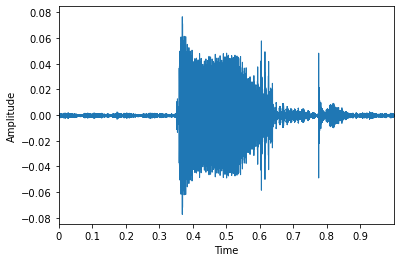

In [4]:
# Wave form
signal, sr = librosa.load(file)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

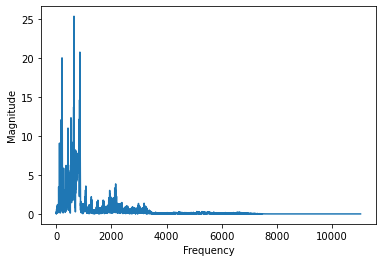

In [5]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

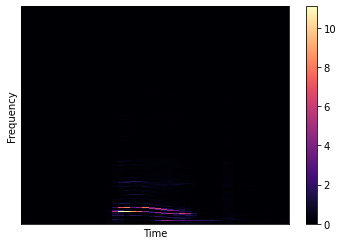

In [6]:
#Generate Spectrogram by using STFT
n_fft = 2048                                                        #number of short terms
hop_length = 512                                                    #number of samples, how much we'll gonna slide
stft = librosa.core.stft(signal,hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length) #enable visualize spectrogram-like data(heatmap)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

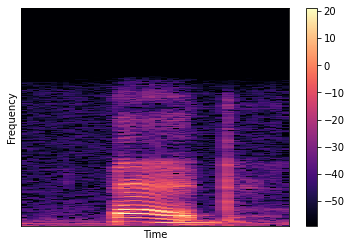

In [7]:
# Apply logaritm to generate log spectrogram
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

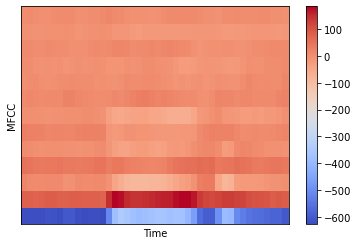

In [8]:
# Extract MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft,
                             hop_length=hop_length, n_mfcc=13) #13 is commonly used
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()